# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The white smartcar does not move during these initial simulation trials, except that it is placed in a new random location for each trial. During red lights, the car is positively rewarded (between ~ 1 to 3) as the car is correctly idled at the stop light. During green lights, the car is penalized (between ~ -4 to -6) as it sits idle without any oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**agent.py:** In the agent.py file, there are multiple flags that can be set to control the simulation.
- One flag, epsilon, is used to control the amount of exploration vs. exploitation. When the agent needs to choose an action, we can choose actions more randomly so that we learn the rewards/penalties of the different actions (exploration), or we can choose actions based on which one results in the highest reward (exploitation). A higher epsilon results in more randomly chosen actions (exploration), and a lower (1-epsilon) results in choosing high reward actions (exploitation). This value must be set between 0 and 1, and if not specified, will default to 1. 
- Anoter flag, num_dummies, which is used when creating an instance of the Environment() class, controls the number of dummy agents (other cars) in the environment. If not specified, this flag will default to 100.
- A third flag is alpha, used when creating an instance of LearningAgent, can be used to modify the learning rate, and defaults to 0.5. This variable should be set between 0 and 1. This alpha variable determines how much of the reward for an action is based on the immediate reward of the state (high alpha) and how much is due to the previous accumulation of rewards for this state (low alpha, 1-alpha).

**environment.py:** In the Environment() class of the environment.py file, the act() function is called when an agent performs an action. This function take as arguments the agent and the action that it wishes to perform. This function will evaluate the environment for the current location of the agent, set rewards based on correct actions and any violations incurred, and then, if this agent is the primary agent (our cab), it will update metrics. This function returns the reward for this current state-action.

**simulator.py:** In the simulator.py file, there are two render methods.
- The render_text() method is always run. This method is the non-GUI display of the simulation. It will update the command prompt display with the trial data for the primary agent (our cab) for each time step.
- The render() method is only run if the display flag is True. This method will update the GUI display by redrawing all elements of the environment each time step.

**planner.py:** In the planner.py file, the next_waypoint() method creates the next waypoint based on the current heading, location, destination. The next_waypoint() function will first consider if the destination is in the East-West direction, and then will consider the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


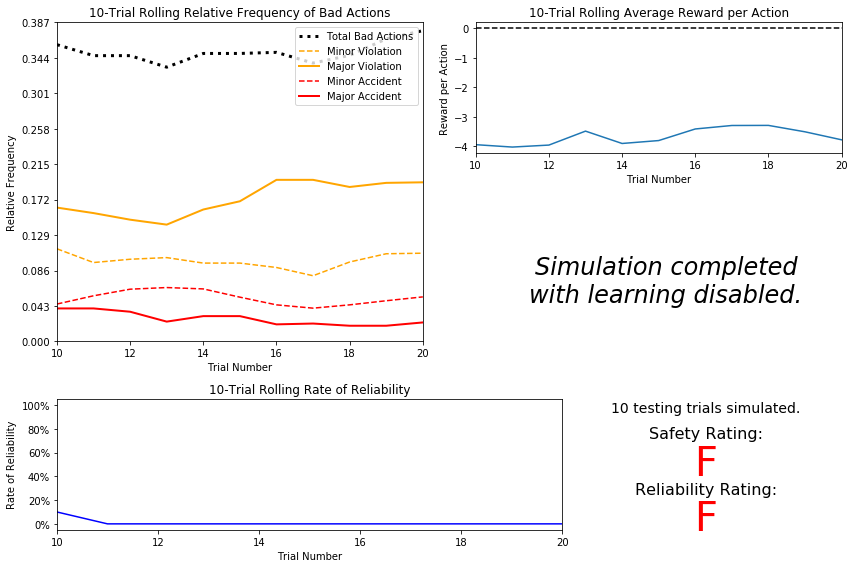

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

As shown in the "Relative Frequency of Bad Actions" graph, the agent is making bad actions about 35% of the time. Of these, about 4% are major accidents and 6% are minor accidents. Because of this, the agent is averaging a reward (penalty) of around -3.75 (as shown in the "Average Reward per Action" graph), suggesting that it is being penalized heavily for its bad actions. From the "Rate of Reliability" graph, it is shown that the agent rarely reaches the destination. As the number of trials increases, the rates of Bad Actions, Reliability, and Reward per Action fluctuate but appear to remain around the same. This is expected as all actions are chosen randomly and so there is no learning happening.

As expected with an agent that is taking random actions, the number of bad outcomes is high and reliability is low, resulting in poor ("F") safety and reliabilty ratings, and therefore, this Smartcab would not be considered safe nor reliable for its passengers.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

I believe the most important feature for learning both safety and efficiency would be the state of the stop light. This would be important to safety as running a red light would likely cause a major accident. The state of the light is also important to efficiency as we want to be moving through green lights if possible (not idling) so that we are consistenly moving towards our destination.

The waypoint feature is most important to efficiency. This feature will keep us moving in the general direction of the destination, instead of driving randomly and hoping that we luck upon the destination.

The left and oncoming features are very important to safety as we will need to know if we can make a left turn on a green light, or right on a red light, without causing a minor accident.

We do not want to include every feature input that we have available to us if they will not help us to learn safety and efficiency. Including all feature inputs will increase the number of states that we need to learn (curse of dimensionality) extending the training time needed. Therefore, the two last features, which we wish to exclude, are right and deadline.

The right feature is irrelevant to learning safety and efficiency. We can assume that on a green light (red for car on the right), the car on the right will obey traffic laws and will stay idle if we are going strait through the intersection. On a red light we will either stay idle, or go right on red. For a right on red, we only care about the car coming from the left. The car on the right cannot interfere with us, no matter the direction that it will travel (there are no u-turns in this simulation).

The deadline feature is not important to safety or efficiency. Obviously, we want to make it to the destination as efficiently as possible, but I don't believe the driving strategy would change as time runs down. Safety will remain the most important goal, so we wouldn't want to change our rules for safety to try to meet the deadline.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The features that I expected to be important are waypoint, light, left, right, and oncoming. The three possible states for waypoint are right, left, and forward. The four possible states for oncoming, left, and right are right, left, forward, and None. The two states for light are red or green. This results in 384 permutations of the feature states to learn. There are 4 primary agent actions needed to be learned for each of the 384 state-actions, which makes 1536 total actions to be learned. With the default set of 100 cars in the environment, and 20 trials to run, I don't believe that all of these state-actions could be covered in training to learn an optimal policy for each state. 

As these state-action pairs will be visited randomly, and actions should be visited multiple times to establish learning rewards, it isn't guaranteed that ALL state-actions would be visited in a reasonable number of training trials. However, I believe enough actions per state should be visited and an optimal state-policy learned within a resonable number of trials (500 - 1000).

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

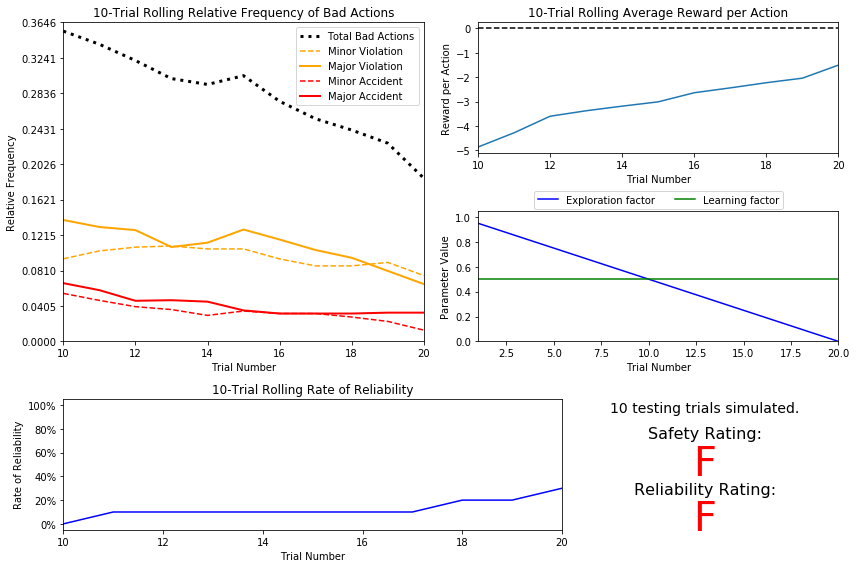

In [15]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The results of this simulation using the default Q-learning settings is a huge improvement on the default (random) agent. The Total Bad Actions seen in the Relative Frequency of Bad Actions graph has decreased as the number of trials increased, to around 20% by the end of 20 trials. Consequently, the Average Reward per Action increases from around -6 at the 10th trial to around -2 by the 20th trial. The Rate of Reliability is much better, around 30% by the 20th trial.

The driving agent required 20 training trials before testing. The epsilon-tolerance was .05 and the epsilon was set to decay linearly at -.05 per step, as evidenced in the graph showing Learning and Exploration factors. Therefore, the number of trials makes sense (1/.05 = 20).

The Safety and Reliability ratings in this case were "F". Looking at the log of the Q-table, there are many state-actions that are still 0.00. It seems that more testing trials would continue to help further decrease the frequency of bad actions and improve the average reward per action.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

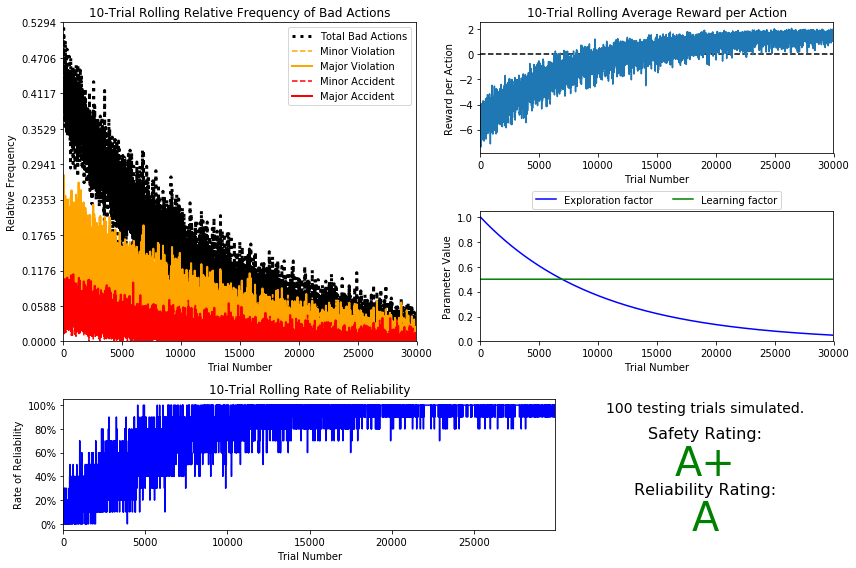

In [34]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The epsilon-decay function chosen for this Q-Learning simulation was e^-0.0001t. This slow decay allowed for 30000 training trials and a good mix of initial exploration with later exploitation. Even with as few as 1500 training trials, the Q-Learning had good results, but I chose a larger number of training trials for more consistent results between simulations. Additionally, there were many state-actions that weren't getting visited, thus the attempt with a large number of trials. I used the default alpha setting of 0.5 as this seemed to be a good tradeoff of immediate and learned rewards.

This optimized Q-Learner gave vastly improved results as compared to the default learner. The final Relative Frequency of Bad Actions decreased from 20% to about 5%. Average Reward per Action improved from -2 to about 1.75. The Rate of Reliability is now hovering around 100%, where it was 30% in the previous model. For 100 testing trials simulated, the Safety and Reliability and now consistently "A+" and "A", as opposed to "F" for the default learner. This consistency seems to indicate that the driving agent has successfully learned an appropriate policy. I'm satisfied with the ratings of the smartcab as the most important rating, Safety, is "A+". A check of the Q-table shows that there were no violations or accidents for any of the 100 testing trials. The Reliability rating is consistently "A". The Q-table shows that only 1 of the trips was not completed on time.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

|  | Waypoint | Oncoming | Left | Right | Light | Action |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|1 | L/F  |  X   |   X  |  X   |  red | idle |
|2 | L    | F/R  |   X  |  X   | green| idle |
|3 | L    |L/None|  X   |  X   | green| left |
|4 | F    |  X   |  X   |  X   | green| forward |
|5 | R    |  X   |  X   |  X   | green| right|
|6 | R    |  X   |  F   |  X   | red  | idle |
|7 | R    |  X   |R/L/None| X  | red  | right|

<center>**Note: X = Don't care**</center>

**Optimal policy (defined):** As shown in the table above, the optimal policy can be outlined without needing to be learned. As seen in table entry 1), If your waypoint is left or forward, but the light is red, the only correct action is to sit idle. For 2), and 3), if the waypoint is left and the light is green, the agent must idle for oncoming cars if they are going forward or to their right, but you may turn left if oncoming car is going to their left or there is no oncoming car. For 4), if the waypoint is forward and the light is green, you may drive forward. For 5), 6), and 7), if the waypoint is right and the light is green, you may proceed to the right. However, if the light is red, you must idle for any car from the left that is going forward, but you may turn right on red otherwise.

**Note: for the following state-action entries, the first line indicates input states as (Waypoint direction, Oncoming car direction, Car to the left direction, state of the light, and Car to the right). The additional four lines indicate the learned actions and their reward/penalty value.**

**Suboptimal policies:** Investigating the learned policies in the Q-Table, most of the state-action entries exhibit the optimal policy. However, here are some examples of sub-optimal policies seen:

('left', 'forward', 'left', 'green', 'left')
- -- forward : 0.82
- -- left : -20.21
- -- right : 0.51
- -- None : -5.62
 
As seen in this state-action entry, the input states indicate that the waypoint should be a left turn, there is an oncoming car moving forward, there is a car to the left and right (not important for this state), and the light is green. Since the oncoming car is moving forward, we cannot turn left. In real life, we would idle until the oncoming car moved through the intersection, then we would go left. However, the way that the reward system is set up in this environment, we are penalized for idling at a green light. Therefore, the forward and right actions are rewarded, whereas left and None actions are penalized. In this case, forward would be the better action (right will take us further away from the destination), but the reward system would give the same reward for forward or right in this case. In this case, the forward was visited more often and so is correct.
 
('left', 'right', 'right', 'red', 'right')
- -- forward : -5.46
- -- left : -30.03
- -- right : 1.44
- -- None : 0.00
 
In this case, the waypoint is to the left and the light is red. The optimal policy would be to wait for a green light and then try to make a left. However, this is one of the few cases in which we have a state-action that has not been visited. So, instead of staying idle, the right on red action is taken as it is a viable option that has been visited previously and rewarded.
 
**Optimal policies:** As mentioned above, 86 of the 96 state-action entries learned the optimal policy. For instance:

('right', 'left', 'forward', 'red', 'left')
- -- forward : -40.00
- -- left : -40.53
- -- right : -20.49
- -- None : 0.82
 
In this state-action, the waypoint is right and the light is red. If no car was coming through from the left, you could make a right on red. However, in this case, a car is coming through the intersection, so the correct action as indicated is None (idle).
 
('right', 'forward', 'left', 'red', None)
- -- forward : -9.78
- -- left : -9.73
- -- right : 2.02
- -- None : 0.54

Again, this state-action indicates a waypoint right on red light. However, this time there is no car coming from the left (car on left is making a left), so the correct action of right has been chosen.
 
('left', None, 'forward', 'green', 'left')
- -- forward : 0.55
- -- left : 2.50
- -- right : 0.39
- -- None : -4.94

Finally, this state-action indicates that we want to make a left turn on green. Since there is no oncoming car, we have the right-of-way and the correct action left has been chosen.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Future rewards will not work for this project because of the environment and the smartcab. 

The reason that this will not work for the environment characteristic is that the environment is always changing. The lights are constantly cycling, there are dummy cars moving randomly through the environment, and the destination is in a new location each trial. This learner only uses the current waypoint because that is constant for that time step. All of the other inputs from the environment will be changing in the future. In other words, future learning only works for an environment that is static.

The second characteristic of the project which invalidates the use of future rewards is the smartcab itself. The starting location of the smartcab, and that of the destination, are randomly chosen at the beginning of each training trial. Even if the environment did not change, any future learning would be made irrelevant at the next trial as previous learning happened based on a specific route, which will have changed in the new trial. If the agent were given many trials to learn, it would negatively affect Q-values because it would try to apply the learned actions from previous trials, which for this new route would be incorrect, and so would accumulate negative rewards.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.